Helpful:

https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview

https://www.youtube.com/watch?v=OgO1gpXSUzU

https://towardsdatascience.com/monte-carlo-simulation-a-practical-guide-85da45597f0e

### Time-series kind 1

Macro data + normal distribution

what is multivariate normal distribution? what can i do here?

In [67]:
from pandas_datareader import wb

data = wb.download(indicator='FP.CPI.TOTL.ZG', country=['US', 'CN', 'DE', 'JP', 'IN'], start=1981, end=2024).reset_index()
data = data.rename(columns={"FP.CPI.TOTL.ZG": "inflation rate (annual)"})
data = data.sort_values(['country', 'year'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26308\3993332606.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator='FP.CPI.TOTL.ZG', country=['US', 'CN', 'DE', 'JP', 'IN'], start=1981, end=2024).reset_index()


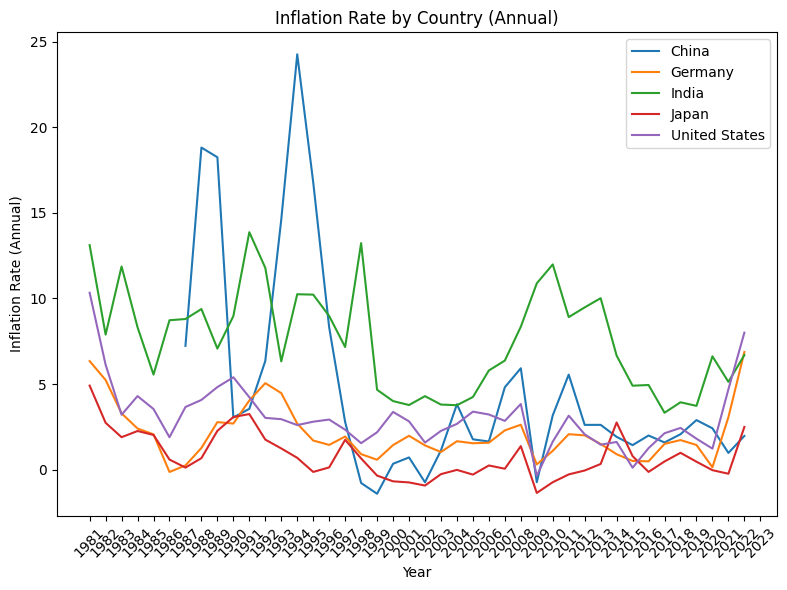

In [68]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('country')

# Create the line plot
plt.figure(figsize=(8, 6))
for name, group in grouped_data:
  plt.plot(group['year'], group['inflation rate (annual)'], label=name)
plt.xlabel('Year')
plt.ylabel('Inflation Rate (Annual)')
plt.title('Inflation Rate by Country (Annual)')
plt.legend()

# Rotate x-axis labels for readability if many years
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [62]:
inflation_rates = data[data['inflation rate (annual)'].notnull()]

mean_inflation_rate_by_country = inflation_rates.groupby('country')['inflation rate (annual)'].mean()
std_inflation_rate_by_country = inflation_rates.groupby('country')['inflation rate (annual)'].std()

mean_inflation_rate_by_country, std_inflation_rate_by_country

(country
 China            4.773168
 Germany          2.104076
 India            7.568620
 Japan            0.808875
 United States    3.080274
 Name: inflation rate (annual), dtype: float64,
 country
 China            6.133436
 Germany          1.598635
 India            3.008085
 Japan            1.346577
 United States    1.906472
 Name: inflation rate (annual), dtype: float64)

In [73]:
import numpy as np

num_years = 10  # Number of years to simulate
num_samples = 10000  # Number of samples to generate

# Generate random samples for each country and year
random_samples = {}
for country in mean_inflation_rate_by_country.index:
    mu = mean_inflation_rate_by_country[country]
    sigma = std_inflation_rate_by_country[country]
    random_samples[country] = np.random.normal(mu, sigma, (num_samples, num_years))

In [74]:
random_samples

{'China': array([[ 10.07312512,  11.88948632,   6.14765447, ...,  12.33453997,
          -4.02926095,  -2.46330327],
        [  1.70852118,   7.90528221, -10.24884438, ...,   2.23163743,
           7.29094733,   7.91116438],
        [ 11.93218849,  11.455984  ,  -1.97416266, ...,  13.96124828,
           8.14872508,  15.77424594],
        ...,
        [  6.23800988,   3.74055552,   3.32889451, ...,   6.64324011,
          -1.84304077,   2.86711418],
        [  9.36115062,   1.22713238,   7.18998743, ...,   1.19918513,
          12.82623179,  -7.18252233],
        [  4.15948602,  11.07804563,   3.86507377, ...,   8.85285142,
          -2.5632574 ,  -3.53215943]]),
 'Germany': array([[ 3.19111884,  4.85790748, -0.73182669, ...,  1.18052352,
         -0.06490223,  2.8422144 ],
        [ 3.43039206,  0.95139896,  0.19601729, ...,  3.12162659,
          1.72985238,  0.75641016],
        [ 3.62547527,  3.58328794,  4.27134186, ...,  1.32187798,
          4.1350499 ,  1.14508048],
        ...

In [77]:
# Calculate the desired statistics across all simulations for each year (e.g., mean)
aggregated_results = {}
for country, data in random_samples.items():
  # Calculate mean inflation rate for each year (across all samples)
  mean_inflation_by_year = np.mean(data, axis=0)
  # You can calculate other statistics here (e.g., standard deviation)
  # std_inflation_by_year = np.std(data, axis=0)
  aggregated_results[country] = mean_inflation_by_year


aggregated_results

{'China': array([4.77007262, 4.90239852, 4.81548397, 4.75609058, 4.81290589,
        4.82393526, 4.65536964, 4.76704395, 4.79281987, 4.80305743]),
 'Germany': array([2.09414585, 2.10937085, 2.08226882, 2.11024576, 2.13491928,
        2.11802895, 2.10807984, 2.08358263, 2.10577035, 2.09058411]),
 'India': array([7.60712114, 7.56214761, 7.58202596, 7.61050731, 7.55654512,
        7.5507436 , 7.55030656, 7.57070364, 7.5404616 , 7.57629123]),
 'Japan': array([0.79162562, 0.81909736, 0.80309486, 0.80185679, 0.79224104,
        0.8045241 , 0.8120108 , 0.81593702, 0.80637963, 0.80495442]),
 'United States': array([3.08886435, 3.08908642, 3.08613128, 3.04852637, 3.08407073,
        3.06415628, 3.09797628, 3.08479779, 3.05517457, 3.06648388])}

### Time-series kind 2

Finance data

### Non-time-series kind 

i.e. roulette? miscolored edges?

Normal vs non-normal

In [86]:
import numpy.random as rnd

def mc_normal(mean, std_dev, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for _ in range(samples):
        results.append(rnd.normal(mean, std_dev))
    return np.array(results)

In [88]:
# configuration
s = 100000 # number of samples
upper_limit = 34 # upper limit from specification
# components
component_1 = mc_normal(5,1,s)
component_2 = mc_normal(10,1,s)
component_3 = mc_normal(15,1,s)
# relationships
total = component_1 + component_2 + component_3
# success conditions
probability = np.sum(total > upper_limit)/len(total)*100
print("Probability of exceeding the time limit: ", round(probability, 3), "%")

Probability of exceeding the time limit:  1.065 %
